In [2]:
#from gemini

import numpy as np
from scipy import signal

def F(t, a=1, b=2):
  """Function representing the signal"""
  return np.sin(a*t) + np.sin(b*t)

def fft_func(f_t, fs):
  """
  This function performs FFT on a sampled signal and determines its frequency.

  Args:
      f_t: The function to be sampled (represented as a python function).
      fs: The sampling rate.

  Returns:
      The dominant frequency of the signal.
  """
  # Generate samples of the function
  t = np.linspace(0, 1, int(fs))
  x = f_t(t)

  # Perform FFT
  X = np.fft.fft(x)
  freqs = np.fft.fftfreq(x.size, d=1/fs)

  # Find the dominant frequency
  dominant_freq = freqs[np.argmax(np.abs(X))]

  return dominant_freq

# Set sampling rates and original frequencies
fs_list = [10, 20, 50]
a = 2  # Original frequency 1
b = 5  # Original frequency 2

# Perform FFT for each sampling rate
for fs in fs_list:
  dominant_freq = fft_func(F, fs)
  print(f"Sampling rate: {fs} Hz, Dominant frequency: {dominant_freq:.2f} Hz")


Sampling rate: 10 Hz, Dominant frequency: 0.00 Hz
Sampling rate: 20 Hz, Dominant frequency: 0.00 Hz
Sampling rate: 50 Hz, Dominant frequency: 0.00 Hz


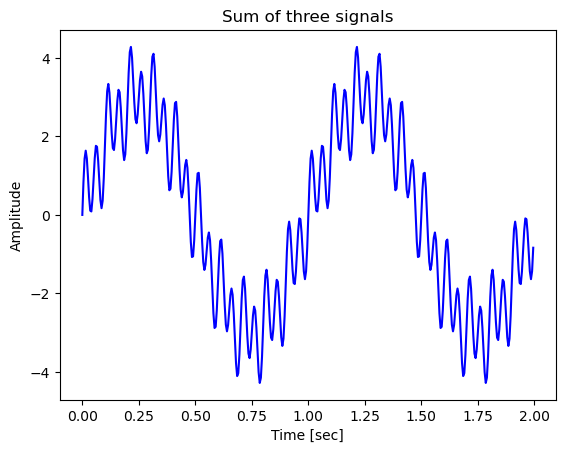

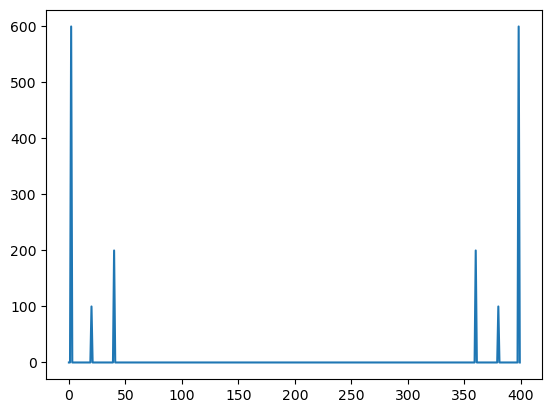

In [4]:
# Import the required packages
import numpy as np
from scipy.fft import fft, rfft
from scipy.fft import fftfreq, rfftfreq
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
%matplotlib inline

# Building a class Signal for better use.
class Signal:
  """
  Generate sinusoidal signals with specific ampltiudes, frequencies, duration,
  sampling rate, and phase.
  Example:
    signal = Signal(amplitude=10, sampling_rate=2000.0)
    sine = signal.sine()
    cosine = signal.cosine()
  """

  def __init__(self, amplitude=1, frequency=10, duration=1, sampling_rate=100.0, phase=0):
    """
    Initialize the Signal class.
    Args:
        amplitude (float): The amplitude of the signal
        frequency (int): The frequency of the signal Hz
        duration (float): The duration of the signal in second
        sampling_rate (float): The sampling per second of the signal
        phase (float): The phase of the signal in radians
    
    Additional parameters,which are required to generate the signal, are
    calculated and defined to be initialized here too:
        time_step (float): 1.0/sampling_rate
        time_axis (np.array): Generate the time axis from the duration and
                              the time_step of the signal. The time axis is
                              for better representation of the signal.
    """
    self.amplitude = amplitude
    self.frequency = frequency
    self.duration = duration
    self.sampling_rate = sampling_rate
    self.phase = phase
    self.time_step = 1.0/self.sampling_rate
    self.time_axis = np.arange(0, self.duration, self.time_step)
  
  # Generate sine wave
  def sine(self):
    """
    Method of Signal
    Returns:
        np.array of sine wave using the pre-defined variables (amplitude,
        frequency, time_axis, and phase)
    """
    return self.amplitude*np.sin(2*np.pi*self.frequency*self.time_axis+self.phase)
  
  # Generate cosine wave
  def cosine(self):
    """
    Method of Signal
    Returns:
        np.array of cosine wave using the pre-defined variables (amplitude,
        frequency, time_axis, and phase)
    """
    return self.amplitude*np.cos(2*np.pi*self.frequency*self.time_axis+self.phase)

# Generate the three signals using Signal class and its method sine()
signal_1hz = Signal(amplitude=3, frequency=1, sampling_rate=200, duration=2)
sine_1hz = signal_1hz.sine()
signal_20hz = Signal(amplitude=1, frequency=20, sampling_rate=200, duration=2)
sine_20hz = signal_20hz.sine()
signal_10hz = Signal(amplitude=0.5, frequency=10, sampling_rate=200, duration=2)
sine_10hz = signal_10hz.sine()

# Sum the three signals to output the signal we want to analyze
signal = sine_1hz + sine_20hz + sine_10hz

# Plot the signal
plt.plot(signal_1hz.time_axis, signal, 'b')
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude')
plt.title('Sum of three signals')
plt.show()


# Apply the FFT on the signal
fourier = fft(signal)

# Plot the result (the spectrum |Xk|)
plt.plot(np.abs(fourier))
plt.show()